In [3]:
import os.path as op
import matplotlib.pyplot as plt
import numpy as np
import pandas
import h5py
import os


import os

##将cooltools生成的E1值转为AB
# 输入文件
file_path = "/cluster/home/jialu/GBM/HiC/otherGBM/cooltool_new/GBMmerge_nona.bed" 

# 读取第一行
with open(file_path,'r') as f:
  first_line = f.readline()

# 读取剩余行 
with open(file_path,'r') as f:
  lines = f.readlines()[1:] 

for i, line in enumerate(lines):
  # 分割行
  cols = line.split()
  
  # 转换第4列
  val = float(cols[3])
  if val > 0:
    cols[3] = 'A'
  else:
    cols[3] = 'B'

  # 拼接新行
  new_line = "\t".join(cols) + "\n"

  # 替换对应行
  lines[i] = new_line

# 输出文件  
out_file = "/cluster/home/jialu/GBM/HiC/otherGBM/cooltool_new/GBMmerge_nona_AB.bed"

with open(out_file,'w') as f:
  f.write(first_line)
  f.writelines(lines)

print("Conversion done.")


Conversion done.


In [61]:
####分别生成_AB.bed  暂时没用


import pandas as pd

# 读取输入文件
df = pd.read_csv('intra_sample_ALL_combined.pcOri_AB.bed', sep='\t')

# 提取第 1 列至第 3 列
cols_1_3 = df.iloc[:, 0:3]

# 提取第 4 列至第 7 列
cols_4_7 = df.iloc[:, 3:7]

# 遍历第 4-7 列
for col in cols_4_7.columns:
    # 合并第 1-3 列和当前列
    merged_columns = pd.concat([cols_1_3, cols_4_7[col]], axis=1)
    
    # 获取当前列的列名
    column_name = col
    
    # 生成文件名
    file_name = f"{column_name}_AB.bed"
    
    # 将数据保存到文件
    merged_columns.to_csv(file_name, sep='\t', index=False)

In [4]:
import pandas as pd


####合并序列

def merge_seq(input_file, output_file):
    # 读取BED文件
    data = pd.read_csv(input_file, sep='\t', header=None)

    # 判断条件并合并行
    i = 0
    while i < len(data) - 1:
        if data.iloc[i, 0] == data.iloc[i+1, 0] and data.iloc[i, 2] == data.iloc[i+1, 1] and data.iloc[i, 3] == data.iloc[i+1, 3]:
            data.iloc[i, 2] = data.iloc[i+1, 2]
            data = data.drop(data.index[i+1]).reset_index(drop=True)
        else:
            i += 1

    # 输出结果
    data.to_csv(output_file, sep='\t', header=None, index=False)

# 指定输入和输出文件列表
input_files = ['/cluster/home/jialu/GBM/HiC/otherGBM/cooltool_new/GBMmerge_nona_AB.bed']
output_files = ['/cluster/home/jialu/GBM/HiC/otherGBM/cooltool_new/GBMmerge_nona_ABmerge.bed']

# 循环处理每个文件
for i in range(len(input_files)):
    input_file = input_files[i]
    output_file = output_files[i]
    merge_seq(input_file, output_file)




In [5]:
###判断loop在cmpt位置

def is_completely_contained(a, b):
    a_chrom, a_start, a_end = a[0], int(a[1]), int(a[2])
    b_chrom, b_start, b_end = b[0], int(b[1]), int(b[2])
    return a_chrom == b_chrom and a_start <= b_start and a_end >= b_end

def process_sequences(a_file, b_file, output_file):
    with open(a_file, 'r') as a:
        next(a)
        a_sequences = [line.strip().split('\t') for line in a]

    with open(b_file, 'r') as b:
        b_sequences = [line.strip().split('\t') for line in b]

    for b_seq in b_sequences:
        b_chrom, b_start, b_end = b_seq[0], int(b_seq[1]), int(b_seq[2])
        b_seq.append('')  # 添加新一列

        for a_seq in a_sequences:
            a_chrom, a_start, a_end, a_col = a_seq[0], int(a_seq[1]), int(a_seq[2]), a_seq[3]
            
            if is_completely_contained(a_seq, b_seq):
                if a_chrom == b_chrom and a_start == b_start and a_end == b_end:
                    b_seq[-1] = a_col
                else:
                    b_seq[-1] += (a_col)

        if b_seq[-1] == '':
            b_seq[-1] = 'A-B'
            
        new_value = int(b_seq[2]) - int(b_seq[1]) - 5000   ###存疑
        b_seq.append(str(new_value))
    with open(output_file, 'w') as output:
        for seq in b_sequences:
            output.write('\t'.join(seq) + '\n')


a_files = ['/cluster/home/jialu/GBM/HiC/otherGBM/cooltool_new/GBMmerge_nona_ABmerge.bed']
b_files = ['/cluster/home/jialu/GBM/hicnew/GBMmerge_mustache_loop.bed']
output_files = ['/cluster/home/jialu/GBM/HiC/otherGBM/cooltool_new/GBM_AB_within.bed']

for a_file, b_file, output_file in zip(a_files, b_files, output_files):
    process_sequences(a_file, b_file, output_file)


In [83]:
##合并cmpt转换的序列
def merge_seq(input_file, output_file):
    # 读取BED文件
    data = pd.read_csv(input_file, sep='\t', header=None)

    # 判断条件并合并行
    i = 0
    while i < len(data) - 1:
        if data.iloc[i, 0] == data.iloc[i+1, 0] and data.iloc[i, 2] == data.iloc[i+1, 1] and data.iloc[i, 5] == data.iloc[i+1, 5]:
            data.iloc[i, 2] = data.iloc[i+1, 2]
            data = data.drop(data.index[i+1]).reset_index(drop=True)
        else:
            i += 1

    # 输出结果
    data.to_csv(output_file, sep='\t', header=None, index=False)
# 指定输入和输出文件列表
input_files = ['NPC2GBM.bed', 'iPSC2GBM.bed', 'pHGG2GBM.bed']
output_files = ['NPC2GBM_merge.bed', 'iPSC2GBM_merge.bed', 'pHGG2GBM_merge.bed']

# 循环处理每个文件
for i in range(len(input_files)):
    input_file = input_files[i]
    output_file = output_files[i]
    merge_seq(input_file, output_file)
    

1
A>A    14292
B>B     3518
A>B     1349
B>A      642
Name: count, dtype: int64


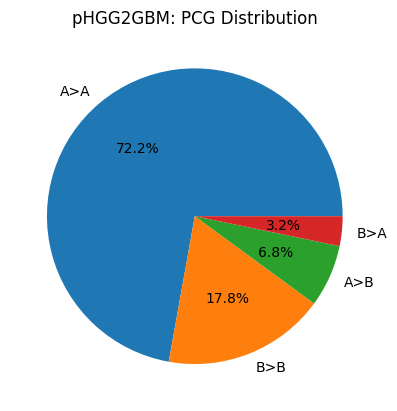

In [92]:
###判断CGC在cmpt位置

import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('pHGG2GBM_pcg.bed', sep='\t', header=None)

# 根据第二列的值进行分类统计
category_counts = data.iloc[:, 1].value_counts()
print(category_counts)
# 获取分类标签和对应的计数值
labels = category_counts.index
sizes = category_counts.values

# # 绘制饼图
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# # 设置图表标题
plt.title('pHGG2GBM: PCG Distribution')

# # 显示图表
plt.show()


In [1]:
##判断是否在同一个anchor
with open("/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/hubgene/GBM_musta_10k_05_G_TESE.bedpe", "r") as input_file:
    with open("/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/hubgene/GBM_musta_10k_05_G_TESE_final.bedpe", "w") as output_file:
        for line in input_file:
            columns = line.strip().split("\t")
            col2 = int(columns[1])
            col3 = int(columns[2])
            col8 = int(columns[7])
            col9 = int(columns[8])
            col12 = int(columns[11])
            col13 = int(columns[12])
            
            if col8 > col2 and col8 < col3 and col9 > col2 and col9 < col3:
                columns.append("1")
            else:
                columns.append("0")
            
            if col12 > col2 and col12 < col3 and col13 > col2 and col13 < col3:
                columns.append("1")
            else:
                columns.append("0")
            
            col14 = columns[13]
            col15 = columns[14]
            
            if col14 == "0" and col15 == "1":
                output_file.write("\t".join(columns) + "\n")
        

In [2]:
###只保留一侧是基因，另一侧是enhancer的情况
with open("/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/hubgene/GBM_G_mustache_TESE.bedpe", "r") as input_file:
    with open("/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/hubgene/GBM_G_mustache_TESE_pair.bedpe", "w") as output_file:
        for line in input_file:
            columns = line.strip().split("\t")
            col2 = int(columns[1])
            col3 = int(columns[2])
            col8 = int(columns[7])
            col9 = int(columns[8])
            col12 = int(columns[11])
            col13 = int(columns[12])
            
            if col8 > col2 and col8 < col3 and col9 > col2 and col9 < col3:
                columns.append("1")
            else:
                columns.append("0")
            
            if col12 > col2 and col12 < col3 and col13 > col2 and col13 < col3:
                columns.append("1")
            else:
                columns.append("0")
            
            output_file.write("\t".join(columns) + "\n")
with open("/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/hubgene/GBM_G_mustache_TESE_pair.bedpe", "r") as input_file:
    with open("/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/hubgene/GBM_G_mustache_TESE__final.bedpe", "w") as output_file:
        for line in input_file:
        
            columns = line.strip().split("\t")
            col14 = columns[13]
            col15 = columns[14]
            
            if col14 == "0" and col15 == "1":
                output_file.write(line)
            elif col14 == "1" and col15 == "0":
                output_file.write(line) 

/tmp/ipykernel_114452/3371457014.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


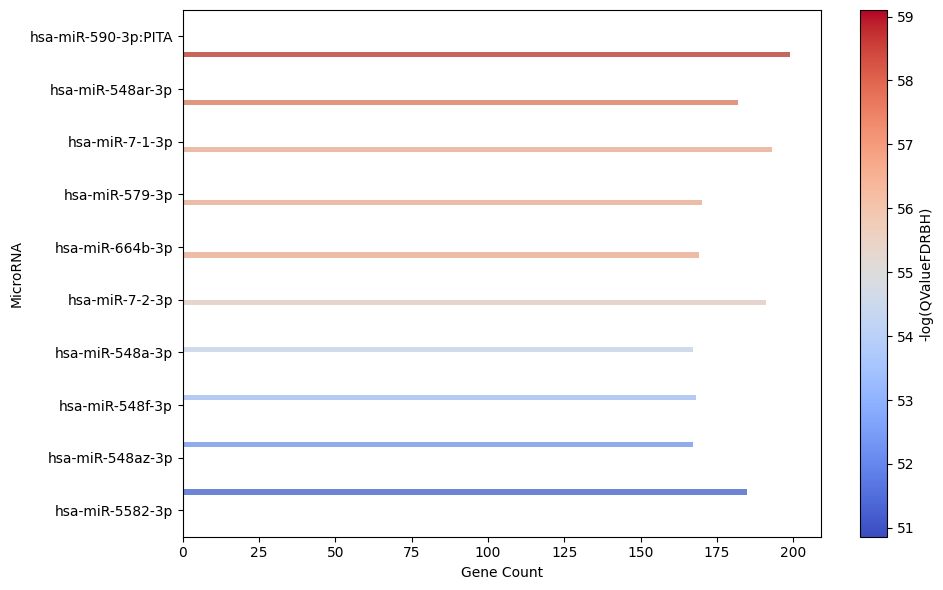

In [82]:
####通路富集图
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取GSEA结果文件
result_file = '/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/dchic/DifferentialResult/GBMvsNPC/geneEnrichment/GBM_sample_geneEnrichment/GBM_sample_geneEnrichment.anchor.txt'
df = pd.read_csv(result_file, delimiter='\t')

# Sort the pathways by QValueFDRBH and select the top 10
top_10_pathways = df.nsmallest(10, 'QValueFDRBH')

# Take the negative and logarithm of QValueFDRBH
top_10_pathways['QValueFDRBH_log'] = -np.log10(top_10_pathways['QValueFDRBH'])
#print(top_10_pathways)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='GenesInTermInQuery', y='ID', palette='coolwarm', data=top_10_pathways, hue='QValueFDRBH_log')

# Set the axis labels
plt.xlabel('Gene Count')
plt.ylabel('MicroRNA')

# Add colorbar
norm = plt.Normalize(-np.log10(top_10_pathways['QValueFDRBH']).max(), -np.log10(top_10_pathways['QValueFDRBH']).min())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('-log(QValueFDRBH)')

# Disable legend for QValueFDRBH_log
ax.legend_.remove()

# Display the plot
plt.show()




In [23]:
pip install seaborn

Looking in indexes: https://pypi.douban.com/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 865.4 kB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_114452/2451156578.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')
/tmp/ipykernel_114452/2451156578.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


<Figure size 1000x800 with 0 Axes>

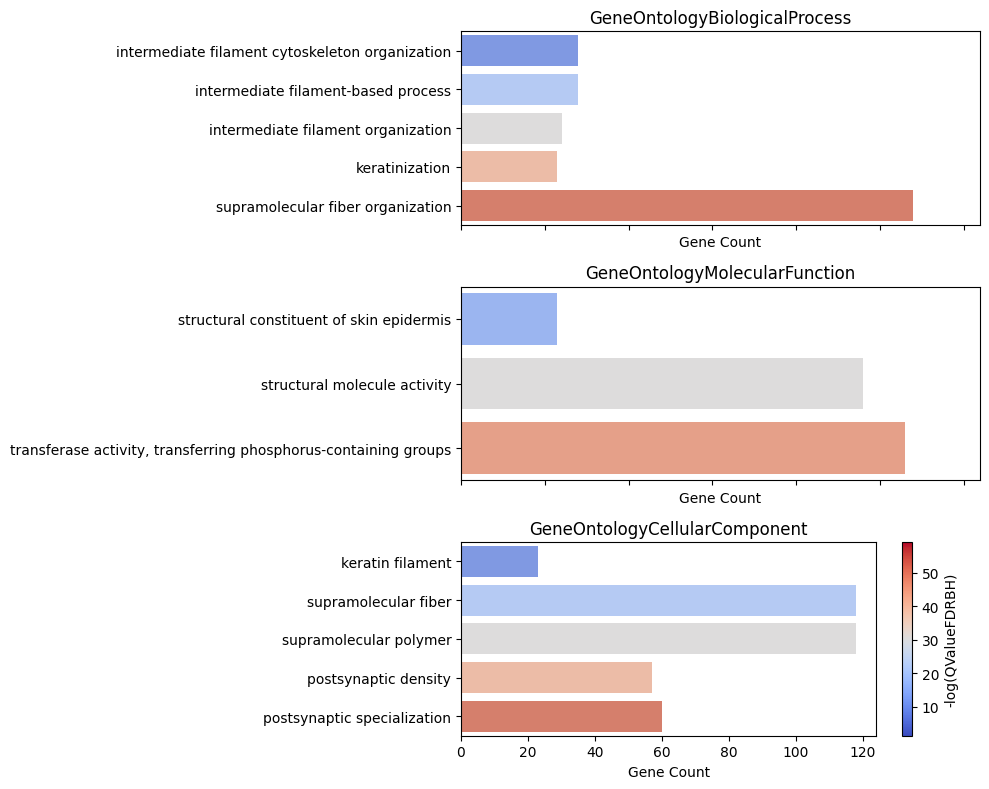

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 读取GSEA结果文件
result_file = '/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/dchic/DifferentialResult/GBMvsNPC/geneEnrichment/GBM_sample_geneEnrichment/GBM_sample_geneEnrichment.anchor.txt'
df = pd.read_csv(result_file, delimiter='\t')

# 选择特定的类别
categories = ['GeneOntologyBiologicalProcess', 'GeneOntologyMolecularFunction', 'GeneOntologyCellularComponent']

# 创建一个颜色映射
cmap = plt.cm.get_cmap('coolwarm')

# 设置图形的大小和布局
plt.figure(figsize=(10, 8))
fig, axes = plt.subplots(len(categories), 1, figsize=(10, 8), sharex=True)

# 逐行绘制图形
for i, category in enumerate(categories):
    # 按类别筛选并选择最小的5个通路
    pathways = df[df['Category'] == category].nsmallest(5, 'QValueFDRBH')

    # 取负并取对数得到-log(QValueFDRBH)
    pathways['QValueFDRBH_log'] = -np.log10(pathways['QValueFDRBH'])

    # 绘制柱状图
    sns.barplot(x='GenesInTermInQuery', y='Name', palette='coolwarm', data=pathways, ax=axes[i])

    # 设置轴标签和标题
    axes[i].set_ylabel('')
    axes[i].set_title(category)
    axes[i].set_xlabel('Gene Count')
    
# 调整布局和间距
plt.tight_layout()

# 添加全局的颜色条
norm = plt.Normalize(-np.log10(df['QValueFDRBH']).max(), -np.log10(df['QValueFDRBH']).min())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('-log(QValueFDRBH)')

# 显示图形
plt.show()


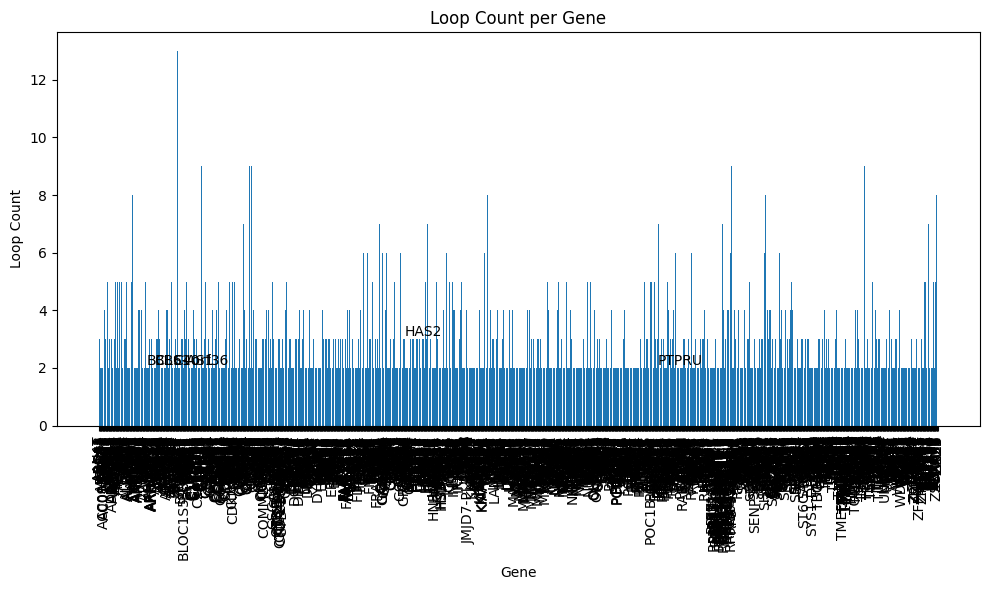

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# Read gene and loop count data from file
file_path = '/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/hubgene/gene'
genes, loop_counts = np.loadtxt(file_path, delimiter='\t', usecols=(0, 1), unpack=True, dtype=str)

# Convert loop counts to integers
loop_counts = loop_counts.astype(int)

# Remove points with loop count equal to 1
mask = loop_counts > 1
selected_genes = genes[mask]
selected_loop_counts = loop_counts[mask]

# Sort selected genes based on loop counts
sorted_indices = np.argsort(selected_loop_counts)[::-1]
sorted_genes = selected_genes[sorted_indices]
sorted_loop_counts = selected_loop_counts[sorted_indices]

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(selected_genes, selected_loop_counts)

# Label only the top five genes
for i in range(5):
    plt.text(sorted_genes[i], selected_loop_counts[i], sorted_genes[i], ha='center', va='bottom')

# Set the x-axis and y-axis labels
plt.xlabel('Gene')
plt.ylabel('Loop Count')

# Set the title
plt.title('Loop Count per Gene')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [7]:
# 获取文件路径
dir_path = "/cluster/home/jialu/GBM/HiC/otherGBM/mcoolfile/insulation/"
files = glob.glob(dir_path + "*.tsv")

# 遍历文件
dfs = []
celltypes = []
for f in files:

  # 读取到DataFrame
  df = pd.read_csv(f, sep="\t")
  dfs.append(df)

  # 从文件名提取细胞类型
  celltype = f.split("_")[0]  
  celltypes.append(celltype)

# 合并及添加细胞类型列
combined_df = pd.concat(dfs)
combined_df["celltype"] = celltypes

# 绘制箱线图
sns.boxplot(x="celltype", y="log2_insulation_score_800000", data=combined_df)

ValueError: Length of values (4) does not match length of index (247100)